In [19]:
# basic packages
import pandas as pd
import numpy as np
# data viz packages
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
# stats one
import statsmodels.formula.api as smf
from scipy.special import expit
import graphviz as gr
%matplotlib inline

In [20]:
style.use("fivethirtyeight")
np.random.seed(123)
n = 100000
X = np.random.normal(20, 100, n).round()
W = np.random.binomial(1, expit((X - X.mean()) / X.std())).astype(bool)
y = np.random.normal(10 - 5 * W + 2 * X, 5)
data = pd.DataFrame(dict(y=y, X=X, W=W))
data.head()

,y,X,W
0,-176.471257,-89.0,True
1,251.150462,120.0,False
2,108.479209,48.0,False
3,-248.353042,-131.0,True
4,-67.955637,-38.0,False


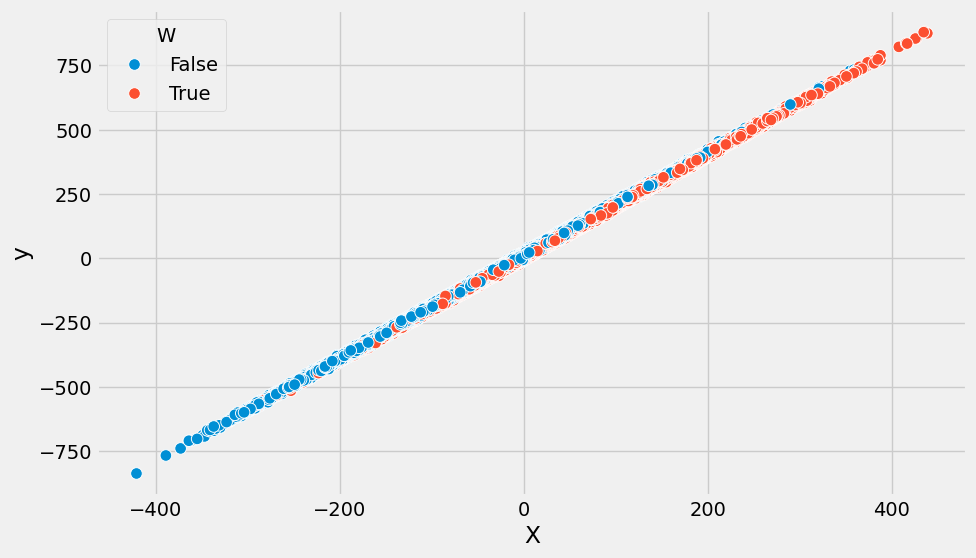

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="X", y="y", hue="W", data=data, s=70)
plt.show()

In [22]:
model1 = smf.ols("y ~ X+W", data=data).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.9905,0.023,442.862,0.000,9.946,10.035
W[T.True],-4.9494,0.035,-142.971,0.000,-5.017,-4.882
X,1.9998,0.000,1.15e+04,0.000,1.999,2.000


In [23]:
def regress(y, Z):
    return np.linalg.inv(Z.T.dot(Z)).dot(Z.T.dot(y))


data.loc[:, "W"] = data["W"].astype("int")
Z = data[["X", "W"]].assign(intercep=1)
y = data["y"]
beta = regress(y, Z)
e = y - Z.dot(beta)

print(beta)

[ 1.99980182 -4.94936196  9.99048374]


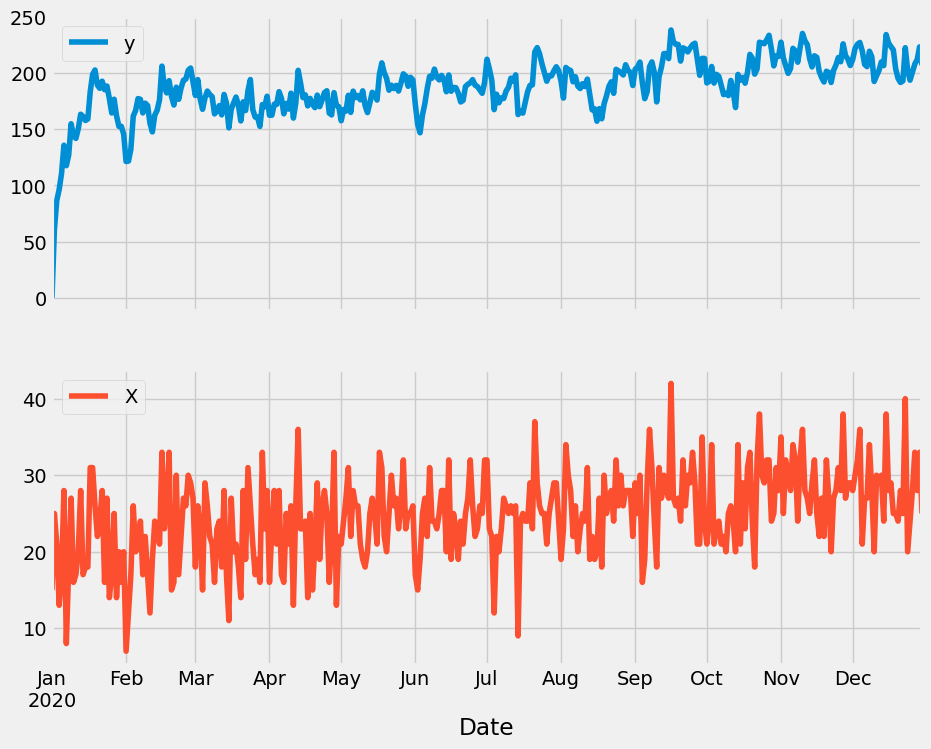

In [24]:
import pandas as pd
import numpy as np
from scipy.special import expit

# Setting the style for visualizations
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# Seed for reproducibility
np.random.seed(123)

# Time Series Settings
n = 365  # number of days in a year
dates = pd.date_range(start="2020-01-01", periods=n, freq="D")  # Daily frequency

# Generate time-dependent X with a trend
time_trend = np.linspace(0, 10, n)  # Linear trend over time
X = np.random.normal(20 + time_trend, 5, n).round()

# Simulating a binary variable W that might depend on X and also changes over time
W = np.random.binomial(1, expit((X - X.mean()) / X.std())).astype(bool)

# Generating y with time-dependent structure
# Incorporating autocorrelation: y(t) depends on y(t-1)
y = np.zeros(n)
for i in range(1, n):
    y[i] = np.random.normal(10 - 5 * W[i] + 2 * X[i] + 0.7 * y[i - 1], 5)

data = pd.DataFrame(dict(Date=dates, y=y, X=X, W=W)).set_index("Date")

# Visualizing the generated time series data
data[["y", "X"]].plot(subplots=True, figsize=(10, 8))
plt.show()

In [25]:
import pandas as pd
import numpy as np
from scipy.special import expit
from datetime import timedelta

# Settings
np.random.seed(345)
n = 365  # Number of days
dates = pd.date_range(start="2020-01-01", periods=n, freq="D")

# Categorical variables
product_types = ["20 amp Fuses", "60 amp Fused Disconnect", "Fuse Reducers", "BR240"]
holiday = ["Yes", "No"]
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
quarter = ["Q1", "Q2", "Q3", "Q4"]
cities = ["Provo", "Springville", "Orem", "Lehi", "Midvale"]

# Define holidays as month-day strings
holidays = [
    "01-01", # New Year's Day
    "01-20", # Martin Luther King Jr. Day
    "02-17", # Presidents' Day
    "05-25", # Memorial Day
    "07-04", # Independence Day
    "09-07", # Labor Day
    "10-12", # Columbus Day
    "11-11", # Veterans Day
    "11-26", # Thanksgiving Day
    "12-25", # Christmas Day
]

# Generating categorical data
weekdays_data = np.random.choice(weekdays, n)
city_data = np.random.choice(cities, n)
quarter_data = np.random.choice(quarter, n)


# Mark dates as holidays based on month and day
holiday_data = [(date.strftime("%m-%d") in holidays) for date in dates]

holiday_data = np.where(holiday_data, "Yes", "No")

day_after_holiday_data = [
    ((date - timedelta(days=1)).strftime("%m-%d") in holidays) for date in dates
]

day_after_holiday_data = np.where(day_after_holiday_data, "Yes", "No")

# Time-dependent and categorical factors influencing sales
time_trend = np.linspace(0, 10, n)
X = np.random.normal(20 + time_trend, 5, n).round()
W = np.random.binomial(1, expit((X - X.mean()) / X.std())).astype(bool)

# Base sales level adjustments for simplicity
base_sales_city = {"Provo": 10, "Springville": 7, "Orem": 15, "Lehi": 17, "Midvale": 22}
base_sales_quarter = {"Q1": 15, "Q2": 20, "Q3": 22, "Q4": 25}
base_sales_weekday = {
    "Monday": 12,
    "Tuesday": 12,
    "Wednesday": 11,
    "Thursday": 12,
    "Friday": 15,
    "Saturday": 20,
    "Sunday": 19,
}
base_sales_holiday = {"Yes": 60, "No": 45}
base_sales_day_after_holiday = {"Yes": 70, "No": 45}

# Generating sales with influences from all factors
sales = np.zeros(n)
for i in range(n):
    base_sales = (
        base_sales_city[city_data[i]]
        + base_sales_quarter[quarter_data[i]]
        + base_sales_weekday[weekdays_data[i]]
        + base_sales_holiday[holiday_data[i]]
        + base_sales_day_after_holiday[day_after_holiday_data[i]]
    )
    sales[i] = np.random.normal(base_sales + 2 * X[i] + (-5 if W[i] else 5), 10)**1.6

# Creating the DataFrame
data = pd.DataFrame(
    {
        "Date": dates,
        "Sales": sales,
        "City": city_data,
        "Quarter": quarter_data,
        "Weekday": weekdays_data,
        "Holiday": holiday_data,
        "Day After Holiday": day_after_holiday_data,
        "X": X,
        "W": W,
    }
).set_index("Date")


data.to_csv("../outputs/salesData.csv")
# Show the first few rows of the DataFrame
data.head()


,Sales,City,Quarter,Weekday,Holiday,Day After Holiday,X,W
Date,,,,,,,,
2020-01-01,4133.778212,Midvale,Q1,Monday,Yes,No,14.0,False
2020-01-02,5038.309570,Lehi,Q3,Monday,No,Yes,17.0,False
2020-01-03,4058.547520,Springville,Q3,Thursday,No,No,21.0,False
2020-01-04,3645.131034,Provo,Q1,Tuesday,No,No,28.0,True
2020-01-05,3733.159448,Springville,Q4,Saturday,No,No,12.0,False


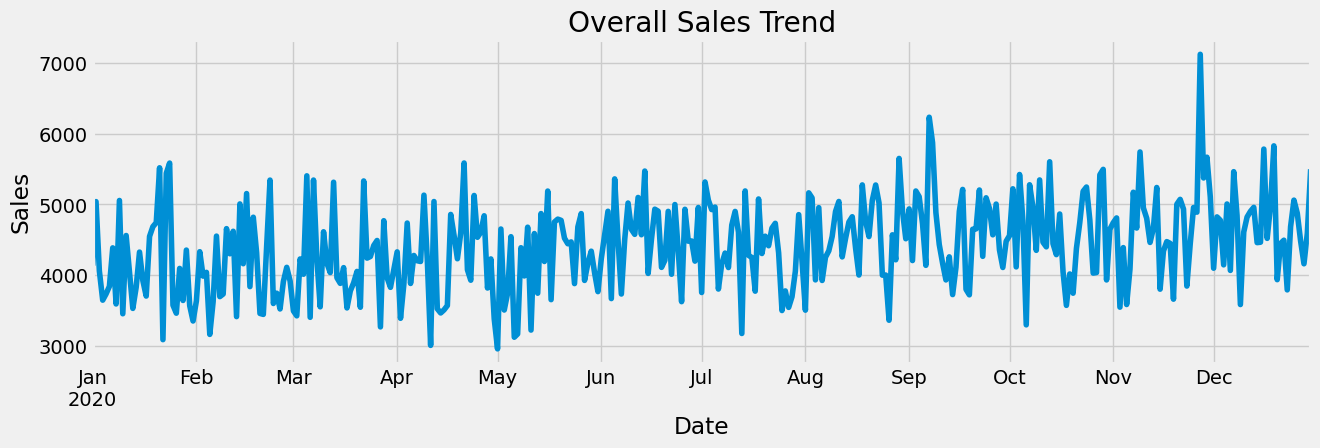

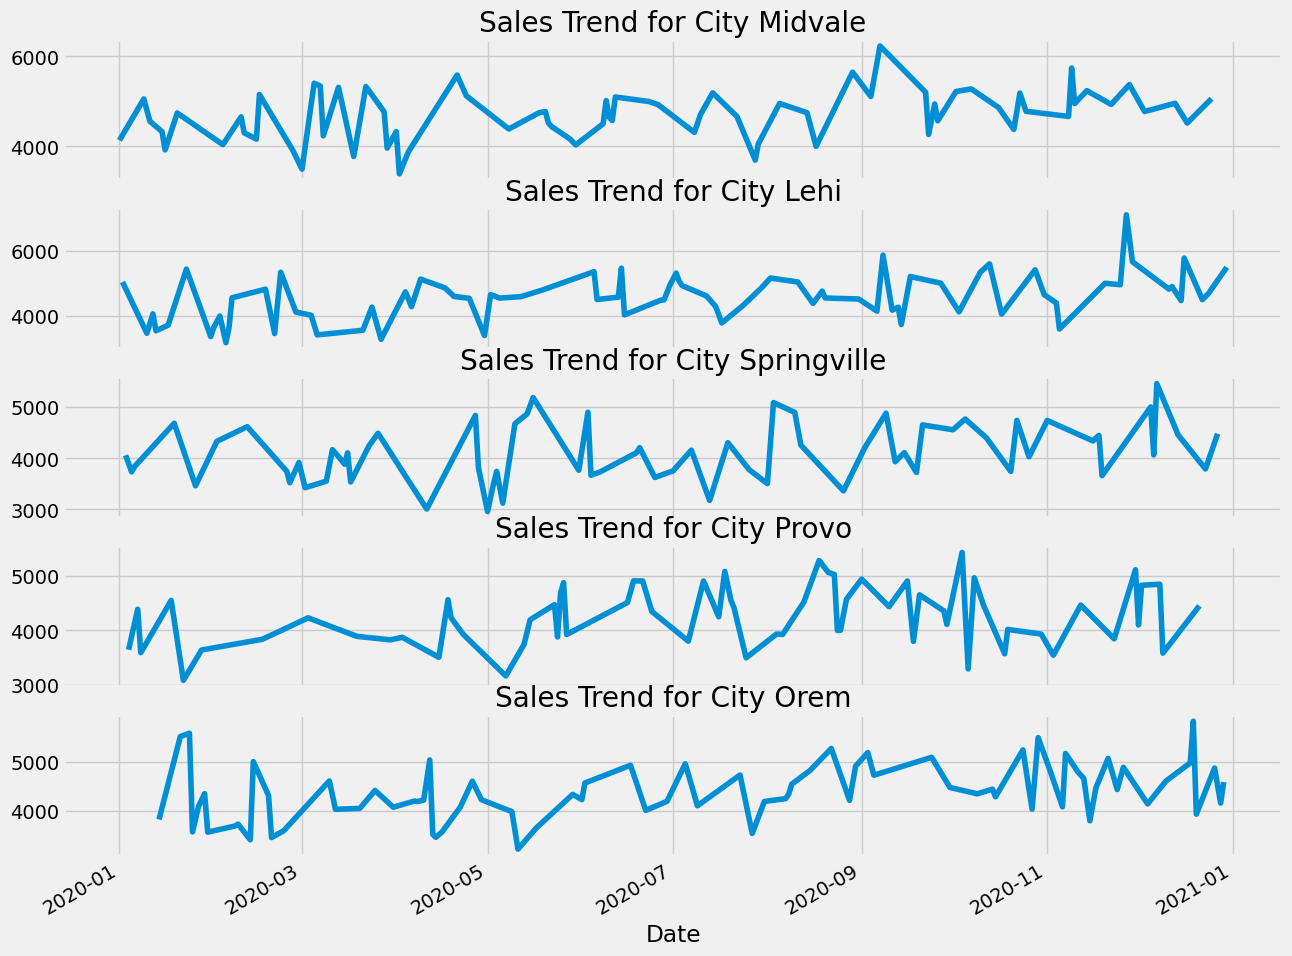

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Sales Trend
data["Sales"].plot(figsize=(14, 4))
plt.title("Overall Sales Trend")
plt.ylabel("Sales")
plt.show()


# Sales by City
unique_cities = data["City"].unique()
fig, axes = plt.subplots(len(unique_cities), 1, figsize=(14, 12), sharex=True)
for i, city in enumerate(unique_cities):
    data[data["City"] == city]["Sales"].plot(ax=axes[i])
    axes[i].set_title(f"Sales Trend for City {city}")
plt.show()

Mean Squared Error: 120546.83675577374


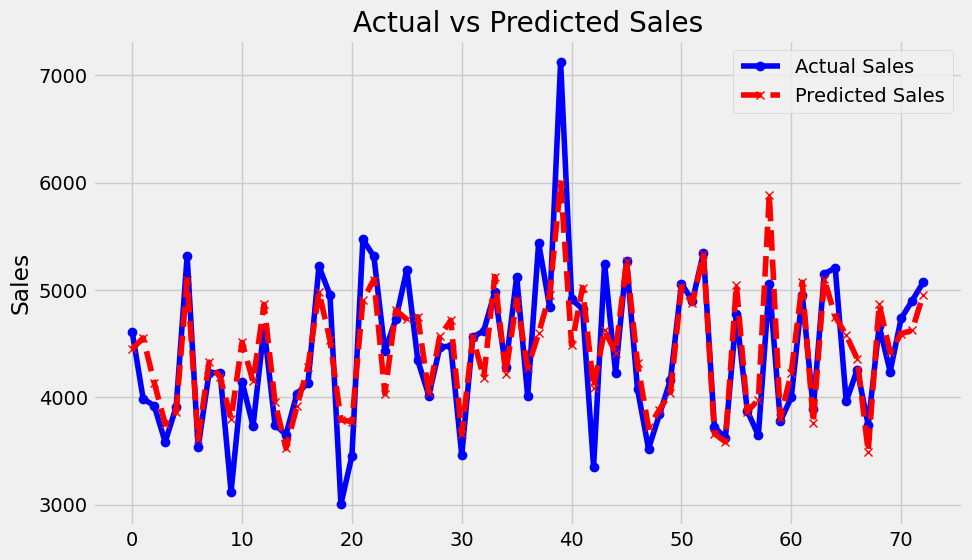

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

data_dummy = pd.get_dummies(data, drop_first=True, dtype='int64')


# Preparing the data
y = data_dummy["Sales"]
X = data_dummy.drop("Sales", axis=1)


# One-hot encoding for categorical variables
categorical_features = ["Product Type", "Weekday", "Quarter", "City"]
one_hot_encoder = OneHotEncoder()


# Pipeline with preprocessing and model
model = Pipeline(
    steps=[("regressor", LinearRegression())]
)


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fitting the model
model.fit(X_train, y_train)


# Predicting and evaluating
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the actual vs predicted sales for the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Sales", color="blue", marker="o")
plt.plot(y_pred, label="Predicted Sales", color="red", linestyle="--", marker="x")
plt.title("Actual vs Predicted Sales")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [28]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

df_dummy = pd.get_dummies(
    columns=data.select_dtypes(include="object").columns, data=data, drop_first=True
).astype(int)

y = df_dummy["Sales"]
X = df_dummy.drop(columns=["Sales"]).assign(
    const=1
)  # Automatic way to get numeric columns


model = sm.OLS(y, X).fit()  # Ordinary Least Squares

results = model.summary()
print(results)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     42.18
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.03e-73
Time:                        15:20:11   Log-Likelihood:                -2664.5
No. Observations:                 365   AIC:                             5365.
Df Residuals:                     347   BIC:                             5435.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
X                        69.25

In [29]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Assuming `data` is your DataFrame and you have categorical columns specified

# One-hot encode the categorical features
encoder = OneHotEncoder(
    sparse=False
)  # Using sparse=False to ensure output is a dense array
categorical_data = encoder.fit_transform(data[categorical_features])

# Convert the encoded features back to a DataFrame
encoded_features = pd.DataFrame(
    categorical_data, columns=encoder.get_feature_names_out(categorical_features)
)

# Concatenate the encoded features with the rest of the numerical data (excluding the target variable 'Sales')
numerical_data = data.drop(categorical_features + ["Sales"], axis=1).reset_index(
    drop=True
)
X_encoded = pd.concat([encoded_features, numerical_data], axis=1)

# Adding a constant for the intercept in the model
X_encoded = sm.add_constant(X_encoded)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, data["Sales"], test_size=0.2, random_state=42
)

# Fit the OLS model with statsmodels
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the model
print(model.summary())

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'